In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([7.47512572e-01, 3.75766793e-01, 4.82213678e-01, 1.34540304e-01,
       8.33368809e-01, 3.40547193e-01, 6.08472620e-01, 7.95830167e-01,
       7.38908621e-01, 6.77174934e-01, 4.18800046e-01, 9.66536709e-01,
       1.93081247e-02, 2.71490262e-01, 8.81116563e-01, 9.82563006e-01,
       9.39385252e-01, 2.49550990e-01, 1.77160243e-01, 6.22140931e-01,
       3.62593398e-01, 8.91656935e-01, 4.13319390e-01, 2.04466446e-01,
       7.21110104e-01, 7.97003142e-01, 5.53613543e-01, 6.92335545e-01,
       2.62900364e-02, 5.22776730e-01, 2.78021089e-01, 6.43905372e-01,
       5.16110193e-01, 2.11984215e-01, 1.23055477e-01, 2.59578758e-01,
       3.96872387e-01, 2.10137926e-02, 2.85610996e-02, 1.50393904e-01,
       1.39671518e-01, 9.40620369e-01, 8.02688823e-01, 5.89663476e-01,
       9.88173324e-01, 8.88242950e-02, 1.56420483e-01, 3.67808805e-01,
       7.55820899e-01, 1.26393588e-01, 8.68668676e-01, 9.26609528e-01,
       8.21120609e-01, 4.22766233e-01, 3.88624023e-01, 3.15790528e-01,
      

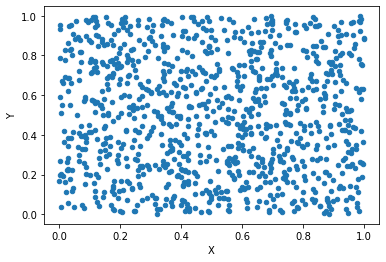

In [3]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



<AxesSubplot:xlabel='X', ylabel='Y'>

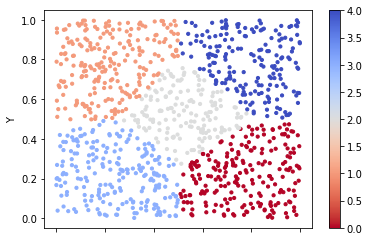

In [4]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm_r)

In [5]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [6]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [7]:
df_norm = norm_func(Univ.iloc[:,1:])

In [8]:
df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


C:\Users\haris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


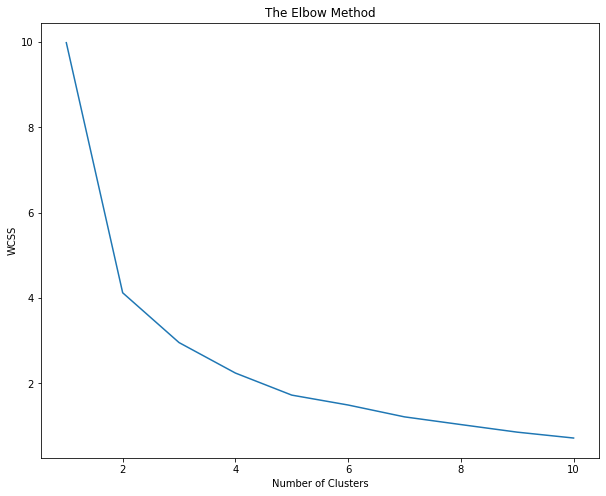

In [9]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [10]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [11]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([4, 2, 0, 4, 4, 3, 3, 4, 3, 2, 3, 4, 4, 1, 3, 1, 3, 1, 0, 4, 0, 4,
       4, 1, 3])

In [12]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,4
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [13]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
4,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667


Text(0.5, 1.0, 'Clusters using KMeans')

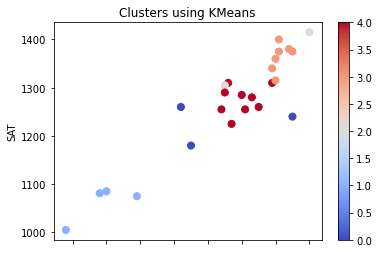

In [14]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [15]:
clf.inertia_

1.678132684074635

In [16]:
WCSS 


[9.988235196638557,
 4.123452442397181,
 2.9556843285735432,
 2.24094486741605,
 1.723590858389283,
 1.4913560423803356,
 1.2134259095852924,
 1.0329182266672727,
 0.8549916327035906,
 0.7170697045095754]